# Neural Networks with Keras

First things first, I'm a realist...

I added instructions to install Tensorflow and Keras (it doesn't come pre-packaged with Anaconda). I'm assuming some have yet to do that, and these packages take time to install.

Try to run the code block below. If it gives an error that Tensorflow or Keras aren't found, you'll need to install those packages. Uncomment the first line in the code block below and run it again.

While that's happening, we'll go over some background and vocabulary relating to neural networks.

In [1]:
#!conda install tensorflow keras

from keras.datasets import fashion_mnist
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## What are Neural Networks?

Neural networks are machine learning models (loosely) inspired by the structure of the human brain. Neural networks can be implemented for regression and classification tasks and are widely used in complex tasks such as image and speech processing, language translation, time-series modeling and forecasting, and anomaly detection. There are numerous variants of neural networks. Some notable examples:

 - Multi-layer Percpetron (MLP) - the vanilla neural network we'll use today
 - Convolutional Neural Network (CNN) - are largely used in image and video processing, but can also be applied to time-series and forecasting problems
 - Recurrent Neural Network (RNN) - used for time-series modeling and forecasting
 - Long- Short-Term Memory Neural Network (LSTM) - an upgrade of RNN. This was the cutting edge of natural language processing before transformers (as in Generative Pre-trained Transformer) ushered in the age of LMMs.
 - Generative Adversarial Networks (GANs) - used for generating novel data (i.e. a genAI model) and fraud detection. GANs comprise parallel neural networks, a generator (creating fake instances of data) and discriminator (trained to detect real data from fake).

 ## Why Neural Networks over other models? The PROs.

 - Ability to model complex nonlinear relationships: Neural networks can automatically learn and represent intricate, nonlinear patterns between inputs and outputs, which many traditional models (like linear regression) cannot do without extensive manual feature engineering.
 - Handling of high-dimensional and unstructured data: NNs excel at processing large-scale, high-dimensional data (e.g. images, audio, and text) where other models often struggle.
 - Feature extraction and automatic feature engineering: NNs 'discover' and construct relevant features from raw data, reducing the need for manual intervention and domain expertise in feature selection.
 - Adaptability in deployment: NNs adapt to new data and improve performance over time, making them suitable for dynamic, real-world applications.

 ## Why not Neural Networks? The CONs.

 - Require large amounts of data: NNs have many many parameters, so they typically need thousands to millions of labeled examples to perform well. For smaller data sets, other ML models are more suitable.
 - Lack interpretability (“black box”): For most NNs (especially deep NNs), we cannot gleen meaning from the parameters.
 - High computational cost: Training neural networks, especially deep NNs, demands significant computational resources (powerful GPUs/TPUs) and can take much longer than training traditional models. Many such models are trained on remote cloud computing servers (pay per compute).
 - Risk of overfitting: Neural networks, with their large number of parameters, are prone to overfitting if not properly regularized, especially when trained on small or noisy datasets.
 - Complexity in development and tuning: Designing, training, and tuning neural networks (e.g., choosing architecture, hyperparameters) is often more complex and time-consuming than working with traditional models, which generally have fewer parameters and simpler structures.

 ## Neural Network Anatomy and The Multi-Layer Perceptron

The term *perceptron* has two common usages: a single artificial neuron or several artificial neurons arranged in a single layer. Either way, a perceptron is a sort of building block for more complex neural networks.

First, let's consider the single 'neuron' interpretation.

![perceptron, by Adam Weaver](../images/perceptron.png)

In the diagram above, each input feature is assigned a weight (parameters) and a weighted sum of features and a bias term are fed through some non-linear activation function. The diagram above can be represented by the following equation:

$$
\hat{y} = f(b + w_0 \cdot x_0 + w_1 \cdot x_1+ w_2 \cdot x_2 + w_3 \cdot x_3)
$$

### Activation Functions

Every perceptron that comprises a neural network has some activation function. Activiation functions are non-linear and without them, a neural network (regardless of size) could be reduced to a single linear neuron. These activation functions make it that for any given region of the feature space, only some neurons will participate and others will be dormant. So the feature space is parsed by different subsets of neurons.

Some example activation functions are:

 - Heaviside function - step function
 - Sigmoid function - same as logit function from logistic regression
 - Rectifying Linear Unit (ReLu) - linear for positive values and zero otherwise. This is the most common activation function.
 - Tanh - hyperbolic tangent function, similar to sigmoid but ranges -1 to 1.

### Multi-Layer Perceptron (the vanilla NN)

![MLP, Kishgore NG](../images/MLP.jpeg)

A MLP comprises layers of perceptrons and each layer may itself contain numerous perceptrons. In this diagram, every neuron in one layer projects onto every neuron in the subsequent layer. These are called *dense* layers.

Generally, in densely connected NNs, each perceptron in a layer is the same (same number of parameters and same activation function).

Glossary:

 - Input layer - This layer accepts the features
 - Hidden layer - layers of perceptrons between input and output. *Deep* Neural Networks refer to NNs with many hidden layers. In the past, 'many' meant more than 3, but today, we have NNs with hundreds or thousands of layers. Deep is subjective and changes as technology improves.
 - Output layer - the layer where predictions are made
  - For regression, the output layer will have a single neuron for each predicted value (often one)
  - For binary classification, the output layer may have one or two neurons.
  - For multi-class classification, the output layer will have as many neurons as there are classes.

### Architecture and Hyper-parameters

When we first create the MLP, we have to decide on the architecture (how many layers, how many neurons per layer, activation functions, etc) and the hyper-parameters (regularization, batch size, epochs).

We haven't had to worry about training time and computational demands with the models we've used thus far, but NN's complexity make these issues non-trivial.

In fitting, we can adjust two hyper-parameters that govern learning: learning rate, batch size, and number of epochs.

 - *Learning Rate* - determines how much the parameters are adjusted at each update
 - *Batch* - a subset of the training data. The training data set is partitioned into batches and the parameters are updated after each batch is processed.
 - *Epoch* - Once through the entire training data. The training algorithm iterates through the entire training data set numerous times, each is an epoch.


| Batch Size | Training Speed | Memory Usage | Generalization |
|-|-|-|-|
| Large | Faster | Higher | Risk of Overfitting |
| Small | Slower | Lower | Regularized |

*Rule of thumb*: If we increase batch size, we should also increase learning rate.

In [2]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import matplotlib.pyplot as plt


## Example: Fashion-MNIST, classifying articles of clothing

The [Fashion-MNIST datase](https://keras.io/api/datasets/fashion_mnist/) comprises 60,000 28x28 pixel, gray-scale images of clothing items from one of the following categories.

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [3]:
x_train.shape

(60000, 28, 28)

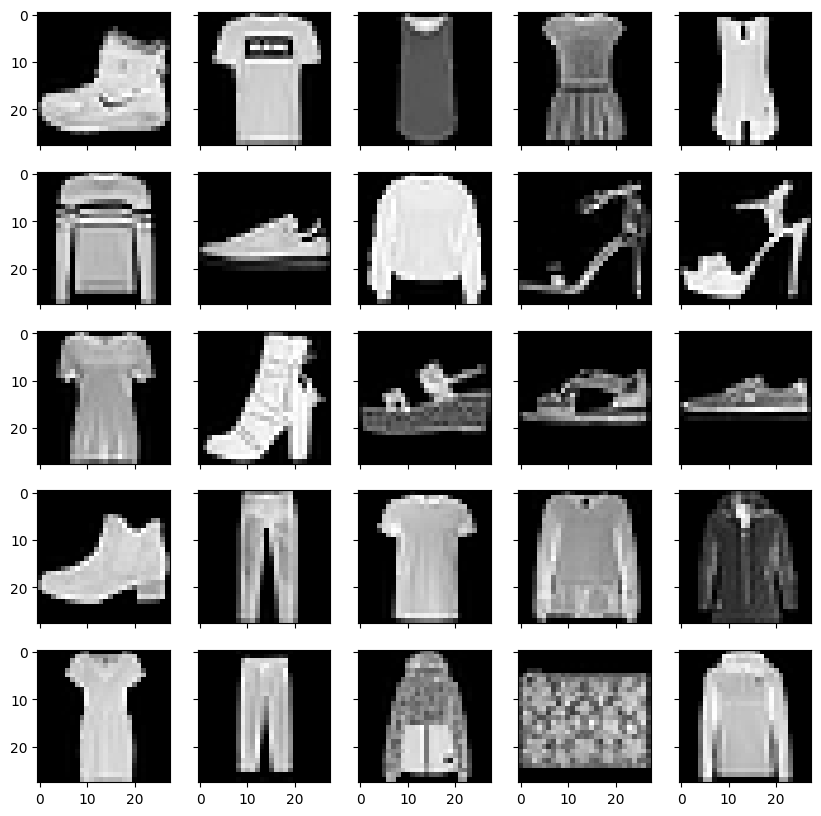

In [4]:
num_samples = 25
fig, ax = plt.subplots(5, 5, figsize = (10, 10), sharex = True, sharey= True)

for k in range(num_samples):
    i,j = int(k/5), k%5
    ax[i,j].imshow(x_train[k,:,:]/255, cmap = 'gray')
plt.show()

In [5]:

# Normalize the data, pixel data is 0-255 (8-bit) but we want 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create a vanilla neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/Users/eatai/.pyenv/versions/3.9.21/envs/tf/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 3:52 155ms/step - accuracy: 0.0938 - loss: 2.3232

  74/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.5475 - loss: 1.2849  

 162/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.6244 - loss: 1.0668

 254/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6629 - loss: 0.9597

 346/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6868 - loss: 0.8930

 438/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.7033 - loss: 0.8462

 531/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.7162 - loss: 0.8096

 622/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7260 - loss: 0.7816

 715/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.7342 - loss: 0.7580

 809/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.7412 - loss: 0.7376

 901/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.7471 - loss: 0.7206

 993/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.7522 - loss: 0.7059

1086/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.7568 - loss: 0.6927

1178/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.7608 - loss: 0.6811

1272/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7645 - loss: 0.6705

1365/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.7678 - loss: 0.6608

1459/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7709 - loss: 0.6519

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.7723 - loss: 0.6481 - val_accuracy: 0.8452 - val_loss: 0.4225


Epoch 2/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8125 - loss: 0.6684

  86/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.8489 - loss: 0.4368

 177/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8521 - loss: 0.4203

 270/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8519 - loss: 0.4163

 363/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.8522 - loss: 0.4141

 456/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8528 - loss: 0.4115

 549/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8534 - loss: 0.4095

 642/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8538 - loss: 0.4082

 734/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8542 - loss: 0.4070

 828/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8546 - loss: 0.4060

 921/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8549 - loss: 0.4051

1014/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8552 - loss: 0.4044

1107/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8555 - loss: 0.4036

1200/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8557 - loss: 0.4029

1290/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8560 - loss: 0.4022

1376/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8563 - loss: 0.4015

1457/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8566 - loss: 0.4008

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8567 - loss: 0.4004 - val_accuracy: 0.8530 - val_loss: 0.4010


Epoch 3/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9375 - loss: 0.2684

  93/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8737 - loss: 0.3638

 184/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8674 - loss: 0.3710

 276/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8668 - loss: 0.3704

 368/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8674 - loss: 0.3681

 460/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8678 - loss: 0.3666

 544/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8683 - loss: 0.3652

 636/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.8688 - loss: 0.3639

 726/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.8694 - loss: 0.3627

 819/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8697 - loss: 0.3617

 912/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8702 - loss: 0.3607

1004/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8707 - loss: 0.3596

1095/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8711 - loss: 0.3587

1187/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8715 - loss: 0.3578

1279/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8718 - loss: 0.3571

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8720 - loss: 0.3565

1463/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8722 - loss: 0.3560

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.8723 - loss: 0.3558 - val_accuracy: 0.8770 - val_loss: 0.3437


Epoch 4/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8750 - loss: 0.2681

  90/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8800 - loss: 0.3022

 176/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8830 - loss: 0.3062

 269/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8848 - loss: 0.3077

 362/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8854 - loss: 0.3090

 450/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8858 - loss: 0.3095

 542/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8858 - loss: 0.3103

 634/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8858 - loss: 0.3112

 727/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8858 - loss: 0.3119

 820/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8858 - loss: 0.3124

 911/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8858 - loss: 0.3129

1003/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8857 - loss: 0.3134

1096/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8857 - loss: 0.3139

1189/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8856 - loss: 0.3143

1281/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8856 - loss: 0.3146

1369/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8855 - loss: 0.3148

1460/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8854 - loss: 0.3150

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.8854 - loss: 0.3152 - val_accuracy: 0.8793 - val_loss: 0.3368


Epoch 5/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8750 - loss: 0.3231

  90/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.8938 - loss: 0.2937

 180/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8907 - loss: 0.2975

 272/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8897 - loss: 0.3004

 364/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8893 - loss: 0.3014

 455/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8895 - loss: 0.3009

 548/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8898 - loss: 0.3001

 641/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8900 - loss: 0.2996

 734/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8901 - loss: 0.2993

 828/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8901 - loss: 0.2993

 920/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8900 - loss: 0.2995

1012/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8899 - loss: 0.2998

1105/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8898 - loss: 0.3001

1198/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8899 - loss: 0.3002

1290/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8899 - loss: 0.3002

1383/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8899 - loss: 0.3003

1475/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8899 - loss: 0.3003

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.8899 - loss: 0.3004 - val_accuracy: 0.8802 - val_loss: 0.3424


Epoch 6/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9062 - loss: 0.2656

  90/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9022 - loss: 0.2641

 182/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.8992 - loss: 0.2714

 273/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8976 - loss: 0.2747

 363/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.8964 - loss: 0.2768

 454/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.8961 - loss: 0.2773

 546/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8959 - loss: 0.2777

 638/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8957 - loss: 0.2782

 729/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8953 - loss: 0.2788

 820/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8952 - loss: 0.2793

 911/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8950 - loss: 0.2798

1003/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8949 - loss: 0.2801

1095/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8949 - loss: 0.2804

1187/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8948 - loss: 0.2807

1278/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8948 - loss: 0.2810

1369/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8947 - loss: 0.2813

1462/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8946 - loss: 0.2816

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.8946 - loss: 0.2817 - val_accuracy: 0.8826 - val_loss: 0.3231


Epoch 7/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9062 - loss: 0.2499

  85/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.8989 - loss: 0.2649

 177/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8994 - loss: 0.2646

 268/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9003 - loss: 0.2641

 359/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9003 - loss: 0.2648

 450/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9002 - loss: 0.2655

 541/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9002 - loss: 0.2660

 635/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9002 - loss: 0.2663

 728/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9001 - loss: 0.2665

 820/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9000 - loss: 0.2668

 912/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9000 - loss: 0.2672

1003/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8999 - loss: 0.2675

1096/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8998 - loss: 0.2678

1187/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8996 - loss: 0.2682

1280/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8995 - loss: 0.2685

1372/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8993 - loss: 0.2689

1462/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8992 - loss: 0.2692

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8992 - loss: 0.2694 - val_accuracy: 0.8857 - val_loss: 0.3203


Epoch 8/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9062 - loss: 0.2994

  89/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8924 - loss: 0.2774

 180/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8958 - loss: 0.2729

 269/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8980 - loss: 0.2693

 361/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8990 - loss: 0.2676

 453/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8995 - loss: 0.2668

 545/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8999 - loss: 0.2661

 632/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9002 - loss: 0.2656

 723/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9005 - loss: 0.2654

 815/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9008 - loss: 0.2650

 907/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9011 - loss: 0.2644

1000/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9012 - loss: 0.2641

1093/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9014 - loss: 0.2638

1185/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9015 - loss: 0.2635

1277/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9017 - loss: 0.2631

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9018 - loss: 0.2628

1461/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9019 - loss: 0.2626

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9020 - loss: 0.2626 - val_accuracy: 0.8820 - val_loss: 0.3242


Epoch 9/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9688 - loss: 0.3152

  39/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9223 - loss: 0.2489  

 109/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.9172 - loss: 0.2424

 194/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.9152 - loss: 0.2416

 278/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9139 - loss: 0.2422

 365/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.9127 - loss: 0.2433

 456/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9120 - loss: 0.2437

 546/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9116 - loss: 0.2437

 638/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9111 - loss: 0.2443

 723/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9109 - loss: 0.2445

 816/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9107 - loss: 0.2445

 907/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9105 - loss: 0.2447

 999/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9103 - loss: 0.2450

1091/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9101 - loss: 0.2453

1182/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9100 - loss: 0.2455

1274/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9098 - loss: 0.2457

1365/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9097 - loss: 0.2459

1456/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9095 - loss: 0.2461

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9095 - loss: 0.2462 - val_accuracy: 0.8769 - val_loss: 0.3420


Epoch 10/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9062 - loss: 0.2299

  90/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9138 - loss: 0.2463

 178/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9135 - loss: 0.2435

 270/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9136 - loss: 0.2423

 363/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9133 - loss: 0.2415

 457/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9132 - loss: 0.2411

 549/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9132 - loss: 0.2407

 641/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9133 - loss: 0.2401

 733/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9133 - loss: 0.2395

 823/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9134 - loss: 0.2391

 915/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9134 - loss: 0.2387

1006/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9133 - loss: 0.2387

1099/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9132 - loss: 0.2388

1192/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9131 - loss: 0.2390

1285/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9130 - loss: 0.2391

1375/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9129 - loss: 0.2392

1466/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9127 - loss: 0.2393

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9126 - loss: 0.2394 - val_accuracy: 0.8898 - val_loss: 0.3151


In [6]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [7]:
model.layers[1].get_weights()

[array([[-0.0707325 , -0.15375805,  0.33507332, ...,  0.01143086,
          0.05975833,  0.2833158 ],
        [ 0.07015453, -0.19290526,  0.27103135, ...,  0.09444941,
          0.06899738, -0.11651741],
        [-0.22116847, -0.2636912 ,  0.40587965, ...,  0.31189623,
          0.15047528,  0.20238996],
        ...,
        [-0.02136268, -0.08346768,  0.29200926, ..., -0.07510836,
         -0.22871964,  0.03877528],
        [-0.08204922,  0.00304062,  0.567514  , ...,  0.29008558,
          0.19101523, -0.02265211],
        [-0.04824322,  0.04985821,  0.4995806 , ...,  0.04626234,
          0.07448614, -0.04508178]], dtype=float32),
 array([ 0.34250513, -0.19184875, -0.21646638,  0.40864944, -0.0194057 ,
         0.22818726, -0.02803127, -0.14575195, -0.02538982,  0.35997972,
         0.34027457,  0.49474302,  0.47666776, -0.01105383, -0.01571255,
        -0.21480627, -0.06399723,  0.3591432 , -0.00980564,  0.46429542,
        -0.00364157,  0.6279002 ,  0.0601235 , -0.29220778, -0.364

In [8]:

weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]

print(weights.shape)
print(biases.shape)


(784, 128)
(128,)


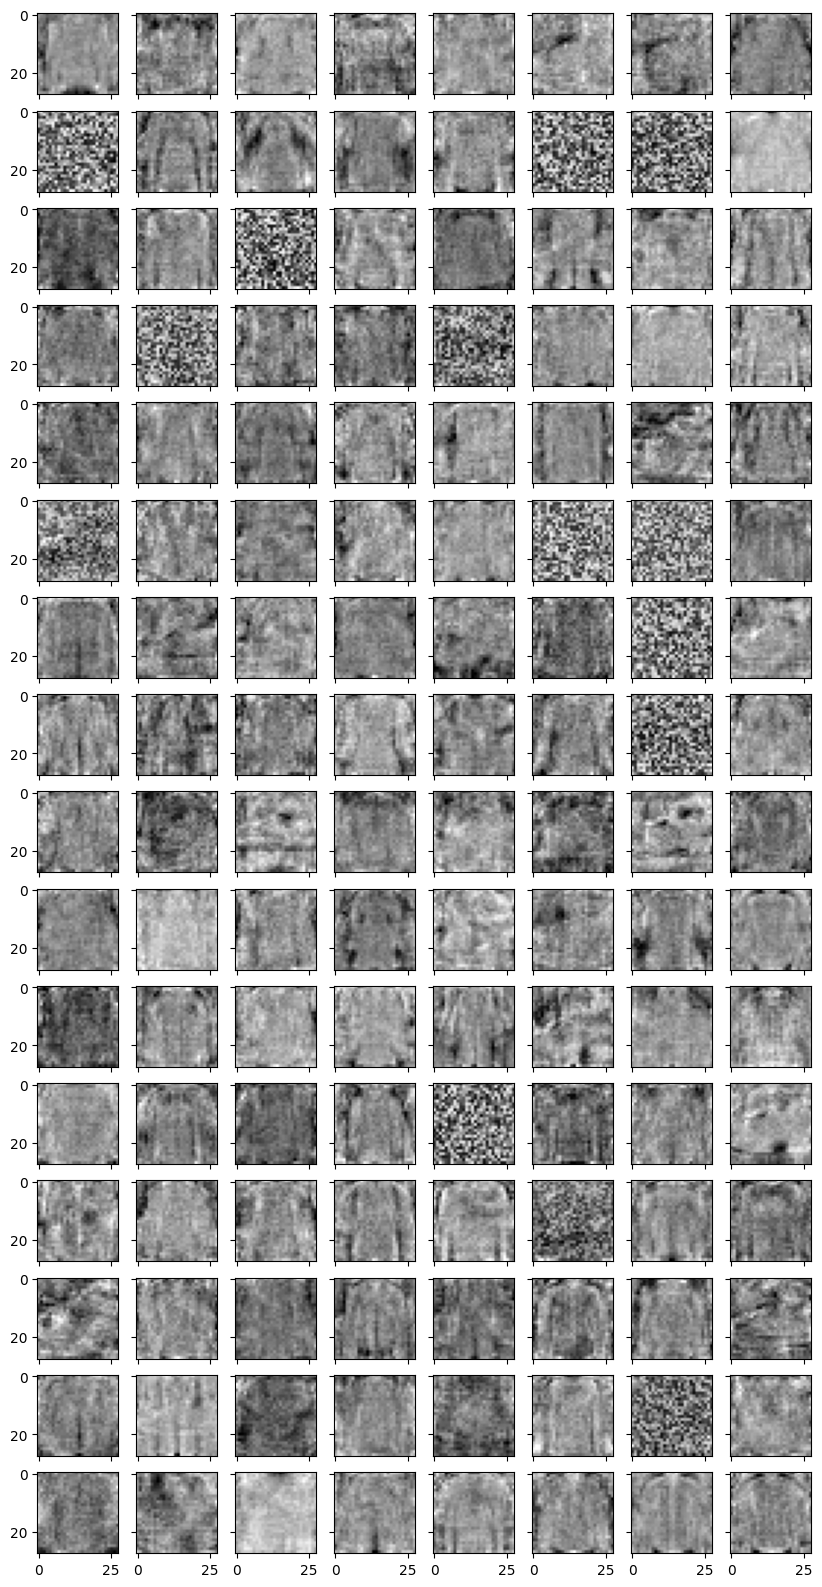

In [9]:
fig, ax = plt.subplots(16, 8, figsize = (10, 20), sharex = True, sharey= True)

for k, weight in enumerate(weights.transpose()):
    i,j = int(k/8), k%8
    ax[i,j].imshow(weight.reshape(28,28), cmap = 'gray')

In [10]:
# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)
y_train_pred = np.argmax(model.predict(x_train), axis=1)


  1/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

209/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step

 222/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step

 445/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step

 660/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step

 871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step

1082/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step

1296/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step

1508/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step

1726/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


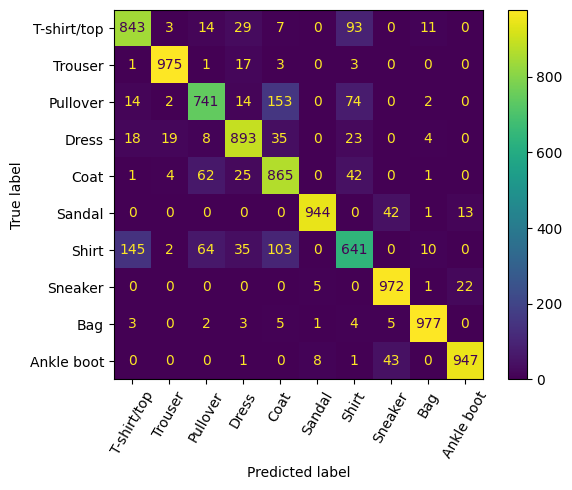

In [11]:


labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

plt.xticks(rotation = 60)
plt.show()

In [12]:
print('TRAINING REPORT:')
print(classification_report(y_train, y_train_pred))

print('TESTING REPORT:')
print(classification_report(y_test, y_pred))

TRAINING REPORT:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6000
           1       0.98      0.99      0.99      6000
           2       0.89      0.79      0.84      6000
           3       0.91      0.94      0.93      6000
           4       0.78      0.90      0.84      6000
           5       0.99      0.96      0.98      6000
           6       0.81      0.72      0.76      6000
           7       0.94      0.98      0.96      6000
           8       0.98      0.99      0.99      6000
           9       0.98      0.97      0.97      6000

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000

TESTING REPORT:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.83      0.74      0.78  